In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

In [19]:
data = pd.read_csv('scp_data.csv')  # 디폴트 구분자는 comma
data.head()

,X0,X1
0,-6.810625,-0.060347
1,-0.303414,-2.979659
2,-7.891267,-11.736160
3,4.327531,2.606615
4,-9.171777,-6.358040


Text(0, 0.5, 'X1')

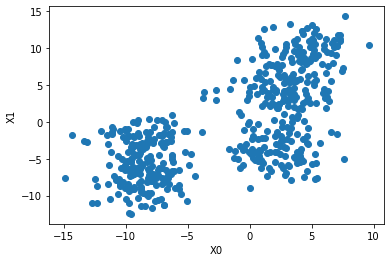

In [20]:
# 시각화
plt.plot(data['X0'],data['X1'],'o')  # x축에 들어갈 데이터, y축에 들어갈 데이터, 'o': 산점도
plt.xlabel('X0') # x축 라벨
plt.ylabel('X1') # y축 라벨

In [21]:
# 컬럼 rename
data = data.rename(columns={'X0':'X'})
data = data.rename(columns={'X1':'Y'})
data

,X,Y
0,-6.810625,-0.060347
1,-0.303414,-2.979659
2,-7.891267,-11.736160
3,4.327531,2.606615
4,-9.171777,-6.358040
...,...,...
495,6.167753,11.217280
496,3.306280,-7.856879
497,-4.374134,-7.369407
498,-8.664096,-5.931189


### 하나의 인덱싱 => 한 점의 좌표 추출

In [39]:
data.values[0] # 0행의 점, x좌표: -6.81xx, y좌표: -0.0603xxx

array([-6.8106249 , -0.06034676])

In [41]:
# 유클리드 거리 계산 메서드
def lengthCheck(ax, ay, bx, by, radius):
    _len = mt.sqrt((ax-bx)**2 + (ay-by)**2) 
    if _len <= radius:
        return True
    else:
        return False

In [42]:
# 각 점을 중심점 삼아 'radius'길이의 반지름을 갖는 원을 생성한다. 
# 생성된 원은 _circle 리스트에 전달(각 원은 리스트 형태이고, 원 안의 점들(인덱스)이 포함된다.)
def makeCircle(ax, ay, data, radius):
    _info = []
    _info.append([ax, ay])
    _circle = []
    
    for idx in range(data['X'].size):
        bx = data.values[idx][0]
        by = data.values[idx][1]
        
        if(lengthCheck(ax, ay, bx, by, radius)):
            #if ax == bx and ay == by:  # 중심점 제외
            #    continue
            _circle.append(idx)
           
    _info.append(_circle)
    
    return _info, len(_circle) # 원 안의 요소들 집합과 원의 사이즈 리턴

In [43]:
# 테스트
# 0행의 좌표를 중심점으로 삼고, 반지름이 3인 원 안의 점들(list)
_circle, _circleSize = makeCircle(data.values[0][0], data.values[0][1], data, 3)
print(_circle)      # _circle[0]
print(_circleSize)

[[-6.810624895025088, -0.060346757151277235], [0, 7, 8, 22, 36, 48, 50, 54, 59, 80, 95, 102, 120, 136, 140, 169, 181, 216, 224, 253, 256, 263, 277, 291, 307, 327, 333, 346, 371, 396, 404, 436, 473, 489]]
34


In [44]:
# 중심점
_circle[0]

[-6.810624895025088, -0.060346757151277235]

In [46]:
# 중심점의 원 안의 점들(데이터 set 인덱스)
_circle[1] # 중심점까지 포함

[0,
 7,
 8,
 22,
 36,
 48,
 50,
 54,
 59,
 80,
 95,
 102,
 120,
 136,
 140,
 169,
 181,
 216,
 224,
 253,
 256,
 263,
 277,
 291,
 307,
 327,
 333,
 346,
 371,
 396,
 404,
 436,
 473,
 489]

In [47]:
def makeTotalCircle(radius):
    totalCircle = []
    totalCircleSize = []
    
    for idx in range(data['X'].size):
        ax = data.values[idx][0]
        ay = data.values[idx][1]
    
        _circle, _circleSize = makeCircle(ax, ay, data, radius)
        totalCircle.append(_circle)
        totalCircleSize.append(_circleSize)
    
    return totalCircle

In [48]:
# 합집합 갱신 
def appendHapZip(totalSelectedPoint, hapZip, selectedPoint):
    totalSelectedPoint.append(selectedPoint[0])
    hapZip += selectedPoint[1]
    
    return totalSelectedPoint, hapZip

In [49]:
# 데이터 갱신(이미 선택된 점들 제거)
def dataRenewal(hapZip, totalCircle):
    newTotalCircle = []
    hapZip = set(hapZip)
    
    for idx in range(500):
        tempSet = set(totalCircle[idx][1])
        
        tempSet = tempSet - hapZip
        tempSet = list(tempSet)
        
        _temp = [] 
        _temp.append(totalCircle[idx][0])
        _temp.append(tempSet)
        
        newTotalCircle.append(_temp)
        
    return newTotalCircle

In [50]:
# 최적의 중심점들을 도출
def processing(totalCircle):
    hapZip = []
    totalSelectedPoint = []
    
    while len(hapZip) < 500:
        # sort
        totalCircle.sort(key = lambda x:len(x[1]), reverse=True)
        
        # 가장 큰 집합 선택
        selectedPoint = totalCircle[0]
        
        # 좌표 append, 합집합 갱신
        totalSelectedPoint, hapZip = appendHapZip(totalSelectedPoint, hapZip, selectedPoint)
        
        # 처음 좌표의 리스트 기준으로 나머지 리스트 갱신
        totalCircle = dataRenewal(hapZip, totalCircle)
        
        
    return totalSelectedPoint

In [51]:
# 모든 점들을 중심점으로 삼는 원 생성, 반지름: 3 
totalCircle = makeTotalCircle(3)

In [64]:
#totalCircle

In [55]:
# 500개의 원 정보
len(totalCircle) 

500

In [56]:
# 위 500개의 원들 중 모든 점을 포함하도록 특정 원을 선택한다. (Greedy 방식)
totalSelectedPoint = processing(totalCircle)

In [58]:
# 아래의 선택된 점들을 중심점으로 삼고 반지름 3인 원들을 그리면 데이터의 모든 점들이 원안에 포함된다. 
totalSelectedPoint

[[-8.010849784678102, -6.850366440142776],
 [2.8216352846256663, 4.136913495172196],
 [2.0097604567262604, -4.058358305114123],
 [4.902193048990443, 10.084446430105672],
 [-8.959881679987337, -1.954042004858892],
 [-10.000137822905048, -10.425973359602867],
 [1.0026573338898048, 10.133946904149617],
 [1.9397566905945585, 0.314399491924696],
 [6.527121501791578, 5.539298778677661],
 [5.036332198569792, -5.64464495166971],
 [-0.7899674747110494, -6.245615220364826],
 [-1.6090987939367123, 4.4484997098738965],
 [-6.632172595724741, -9.08632540183337],
 [-6.605503110707942, -1.6807244277222984],
 [-11.425554452845542, -2.938408825373928],
 [5.6764496868279695, -2.877536152890145],
 [5.373740422273478, 12.636983164866734],
 [-12.281305912234053, -8.64686704463743],
 [-5.235974902635094, -4.119357783095237],
 [7.081399420875013, 11.73787445447032],
 [4.39552307717467, 0.07797613276763826],
 [-11.52250263011322, -1.8271859527260117],
 [-0.08462010441885902, 4.101145718078247]]

In [63]:
for radius in range(3,15):
    totalCircle = makeTotalCircle(radius)
    totalSelectedPoint = processing(totalCircle)
    print ("반지름 길이: {radius}인 원 생성, 선택된 점 들".format(radius=radius))
    print(totalSelectedPoint)
    print("선택된 원의 갯수: {num}".format(num=len(totalSelectedPoint)))
    print("\n\n")

반지름 길이: 3인 원 생성, 선택된 점 들
[[-8.010849784678102, -6.850366440142776], [2.8216352846256663, 4.136913495172196], [2.0097604567262604, -4.058358305114123], [4.902193048990443, 10.084446430105672], [-8.959881679987337, -1.954042004858892], [-10.000137822905048, -10.425973359602867], [1.0026573338898048, 10.133946904149617], [1.9397566905945585, 0.314399491924696], [6.527121501791578, 5.539298778677661], [5.036332198569792, -5.64464495166971], [-0.7899674747110494, -6.245615220364826], [-1.6090987939367123, 4.4484997098738965], [-6.632172595724741, -9.08632540183337], [-6.605503110707942, -1.6807244277222984], [-11.425554452845542, -2.938408825373928], [5.6764496868279695, -2.877536152890145], [5.373740422273478, 12.636983164866734], [-12.281305912234053, -8.64686704463743], [-5.235974902635094, -4.119357783095237], [7.081399420875013, 11.73787445447032], [4.39552307717467, 0.07797613276763826], [-11.52250263011322, -1.8271859527260117], [-0.08462010441885902, 4.101145718078247]]
선택된 원의 갯수: 2